# Data Mining Final Project

## Group Registration

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |      Filipe Dias        |       r20181050        | 
| 2    |      Inês Santos       |       r20191184         | 
| 3    |      Manuel Marreiros       |       r20191223        | 

## 1. Data Exploration

### 1.1. Initial Analysis

In [145]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
from IPython.core.display import HTML
from sklearn.impute import KNNImputer

In [2]:
# Reading the data
customers = pd.read_sas("a2z_insurance.sas7bdat")

In [3]:
# Setting the Customer ID as the index of the data
customers.set_index('CustID', inplace = True)

In [5]:
# Dataset head
customers.head()

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
1.0,1985.0,1982.0,b'2 - High School',2177.0,1.0,1.0,380.97,0.39,375.85,79.45,146.36,47.01,16.89
2.0,1981.0,1995.0,b'2 - High School',677.0,4.0,1.0,-131.13,1.12,77.46,416.20,116.69,194.48,106.13
3.0,1991.0,1970.0,b'1 - Basic',2277.0,3.0,0.0,504.67,0.28,206.15,224.50,124.58,86.35,99.02
4.0,1990.0,1981.0,b'3 - BSc/MSc',1099.0,4.0,1.0,-16.99,0.99,182.48,43.35,311.17,35.34,28.34
5.0,1986.0,1973.0,b'3 - BSc/MSc',1763.0,4.0,1.0,35.23,0.90,338.62,47.80,182.59,18.78,41.45


In [12]:
# Dataset data types
customers.dtypes

FirstPolYear     float64
BirthYear        float64
EducDeg           object
MonthSal         float64
GeoLivArea       float64
Children         float64
CustMonVal       float64
ClaimsRate       float64
PremMotor        float64
PremHousehold    float64
PremHealth       float64
PremLife         float64
PremWork         float64
dtype: object

In [13]:
# Count of missing values
customers.isnull().sum()

FirstPolYear      30
BirthYear         17
EducDeg           17
MonthSal          36
GeoLivArea         1
Children          21
CustMonVal         0
ClaimsRate         0
PremMotor         34
PremHousehold      0
PremHealth        43
PremLife         104
PremWork          86
dtype: int64

In [14]:
# Duplicated observations
customers.duplicated().sum()

3

In [15]:
# Checking the duplicated rows
customers[customers.duplicated(keep=False)]

,FirstPolYear,BirthYear,EducDeg,MonthSal,GeoLivArea,Children,CustMonVal,ClaimsRate,PremMotor,PremHousehold,PremHealth,PremLife,PremWork
CustID,,,,,,,,,,,,,
2076.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
2100.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
3507.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56
8014.0,1987.0,1987.0,b'2 - High School',1912.0,4.0,1.0,290.61,0.58,202.37,177.25,306.39,63.90,-0.11
8122.0,1977.0,1974.0,b'2 - High School',2204.0,4.0,1.0,-22.11,1.00,214.93,88.90,266.94,39.23,42.12
9554.0,1986.0,1952.0,b'2 - High School',3900.0,4.0,0.0,-119.35,1.10,163.03,481.75,224.82,94.35,18.56


We identified the duplicated rows presented above, however, we did not consider this a mistake, since it can just be a coincidence, and kept the records.

In [8]:
# Descriptive statistics
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
FirstPolYear,10266.0,1991.062634,511.267913,1974.00,1980.00,1986.00,1992.0000,53784.00
BirthYear,10279.0,1968.007783,19.709476,1028.00,1953.00,1968.00,1983.0000,2001.00
MonthSal,10260.0,2506.667057,1157.449634,333.00,1706.00,2501.50,3290.2500,55215.00
GeoLivArea,10295.0,2.709859,1.266291,1.00,1.00,3.00,4.0000,4.00
Children,10275.0,0.706764,0.455268,0.00,0.00,1.00,1.0000,1.00
CustMonVal,10296.0,177.892605,1945.811505,-165680.42,-9.44,186.87,399.7775,11875.89
ClaimsRate,10296.0,0.742772,2.916964,0.00,0.39,0.72,0.9800,256.20
PremMotor,10262.0,300.470252,211.914997,-4.11,190.59,298.61,408.3000,11604.42
PremHousehold,10296.0,210.431192,352.595984,-75.00,49.45,132.80,290.0500,25048.80
PremHealth,10253.0,171.580833,296.405976,-2.11,111.80,162.81,219.8200,28272.00


### 1.2. Visual Exploration

In [16]:
# Defining metric and non-metric features
non_metric_features = ["EducDeg", "GeoLivArea", "Children"]
metric_features = customers.columns.drop(non_metric_features).to_list()

In [92]:
# Label dictionary where we associate the name of each variable in the dataset to a more human-readable label
labels = {'FirstPolYear':'First Policy Year', 
          'BirthYear':'Birthday Year', 
          'EducDeg': 'Education',
          'MonthSal':'Salary',
          'GeoLivArea': 'Geographical Area',
          'Children': 'Children',
          'CustMonVal':'Customer Monetary Value',
          'ClaimsRate':'Claims Rate', 
          'PremMotor':'Motor', 
          'PremHousehold':'Household', 
          'PremHealth':'Health', 
          'PremLife':'Life', 
          'PremWork':'Work Compensation'}

### <center>Histograms</center>

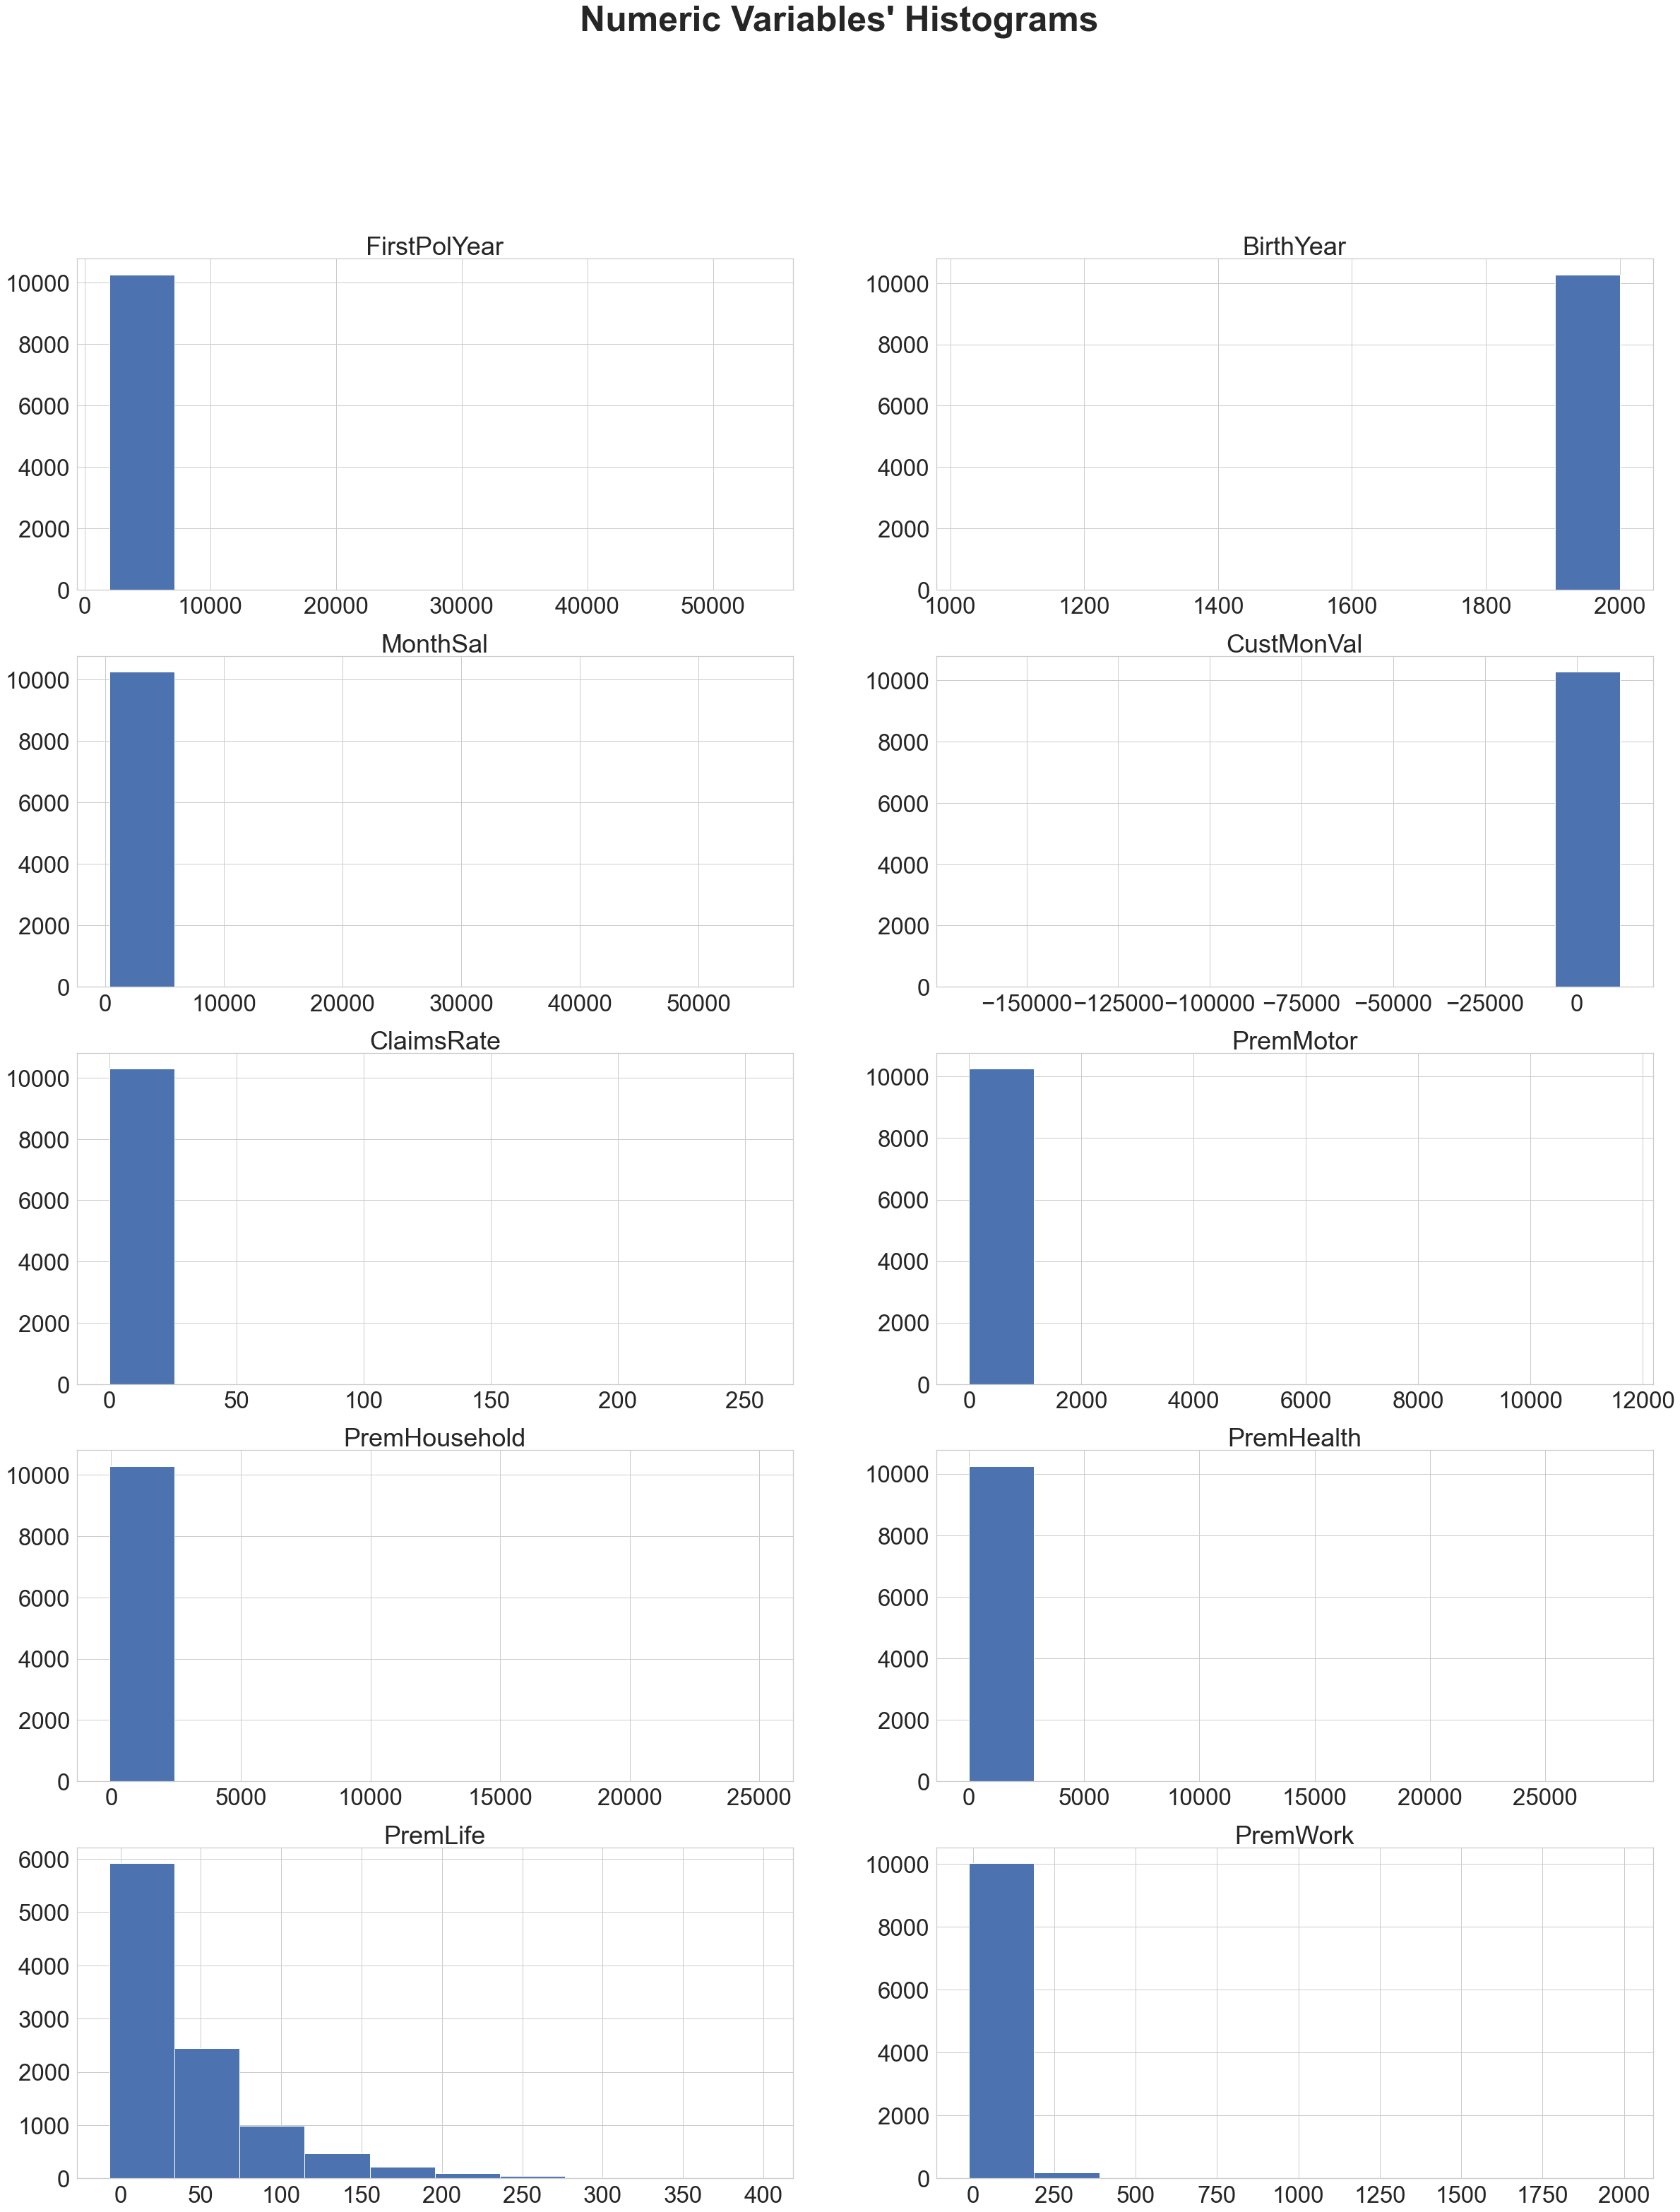

In [109]:
# All Numeric Variables' Histograms in one figure
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(40, 50))

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(customers[feat])
    ax.set_title(feat)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

### <center>Box-Plots</center>

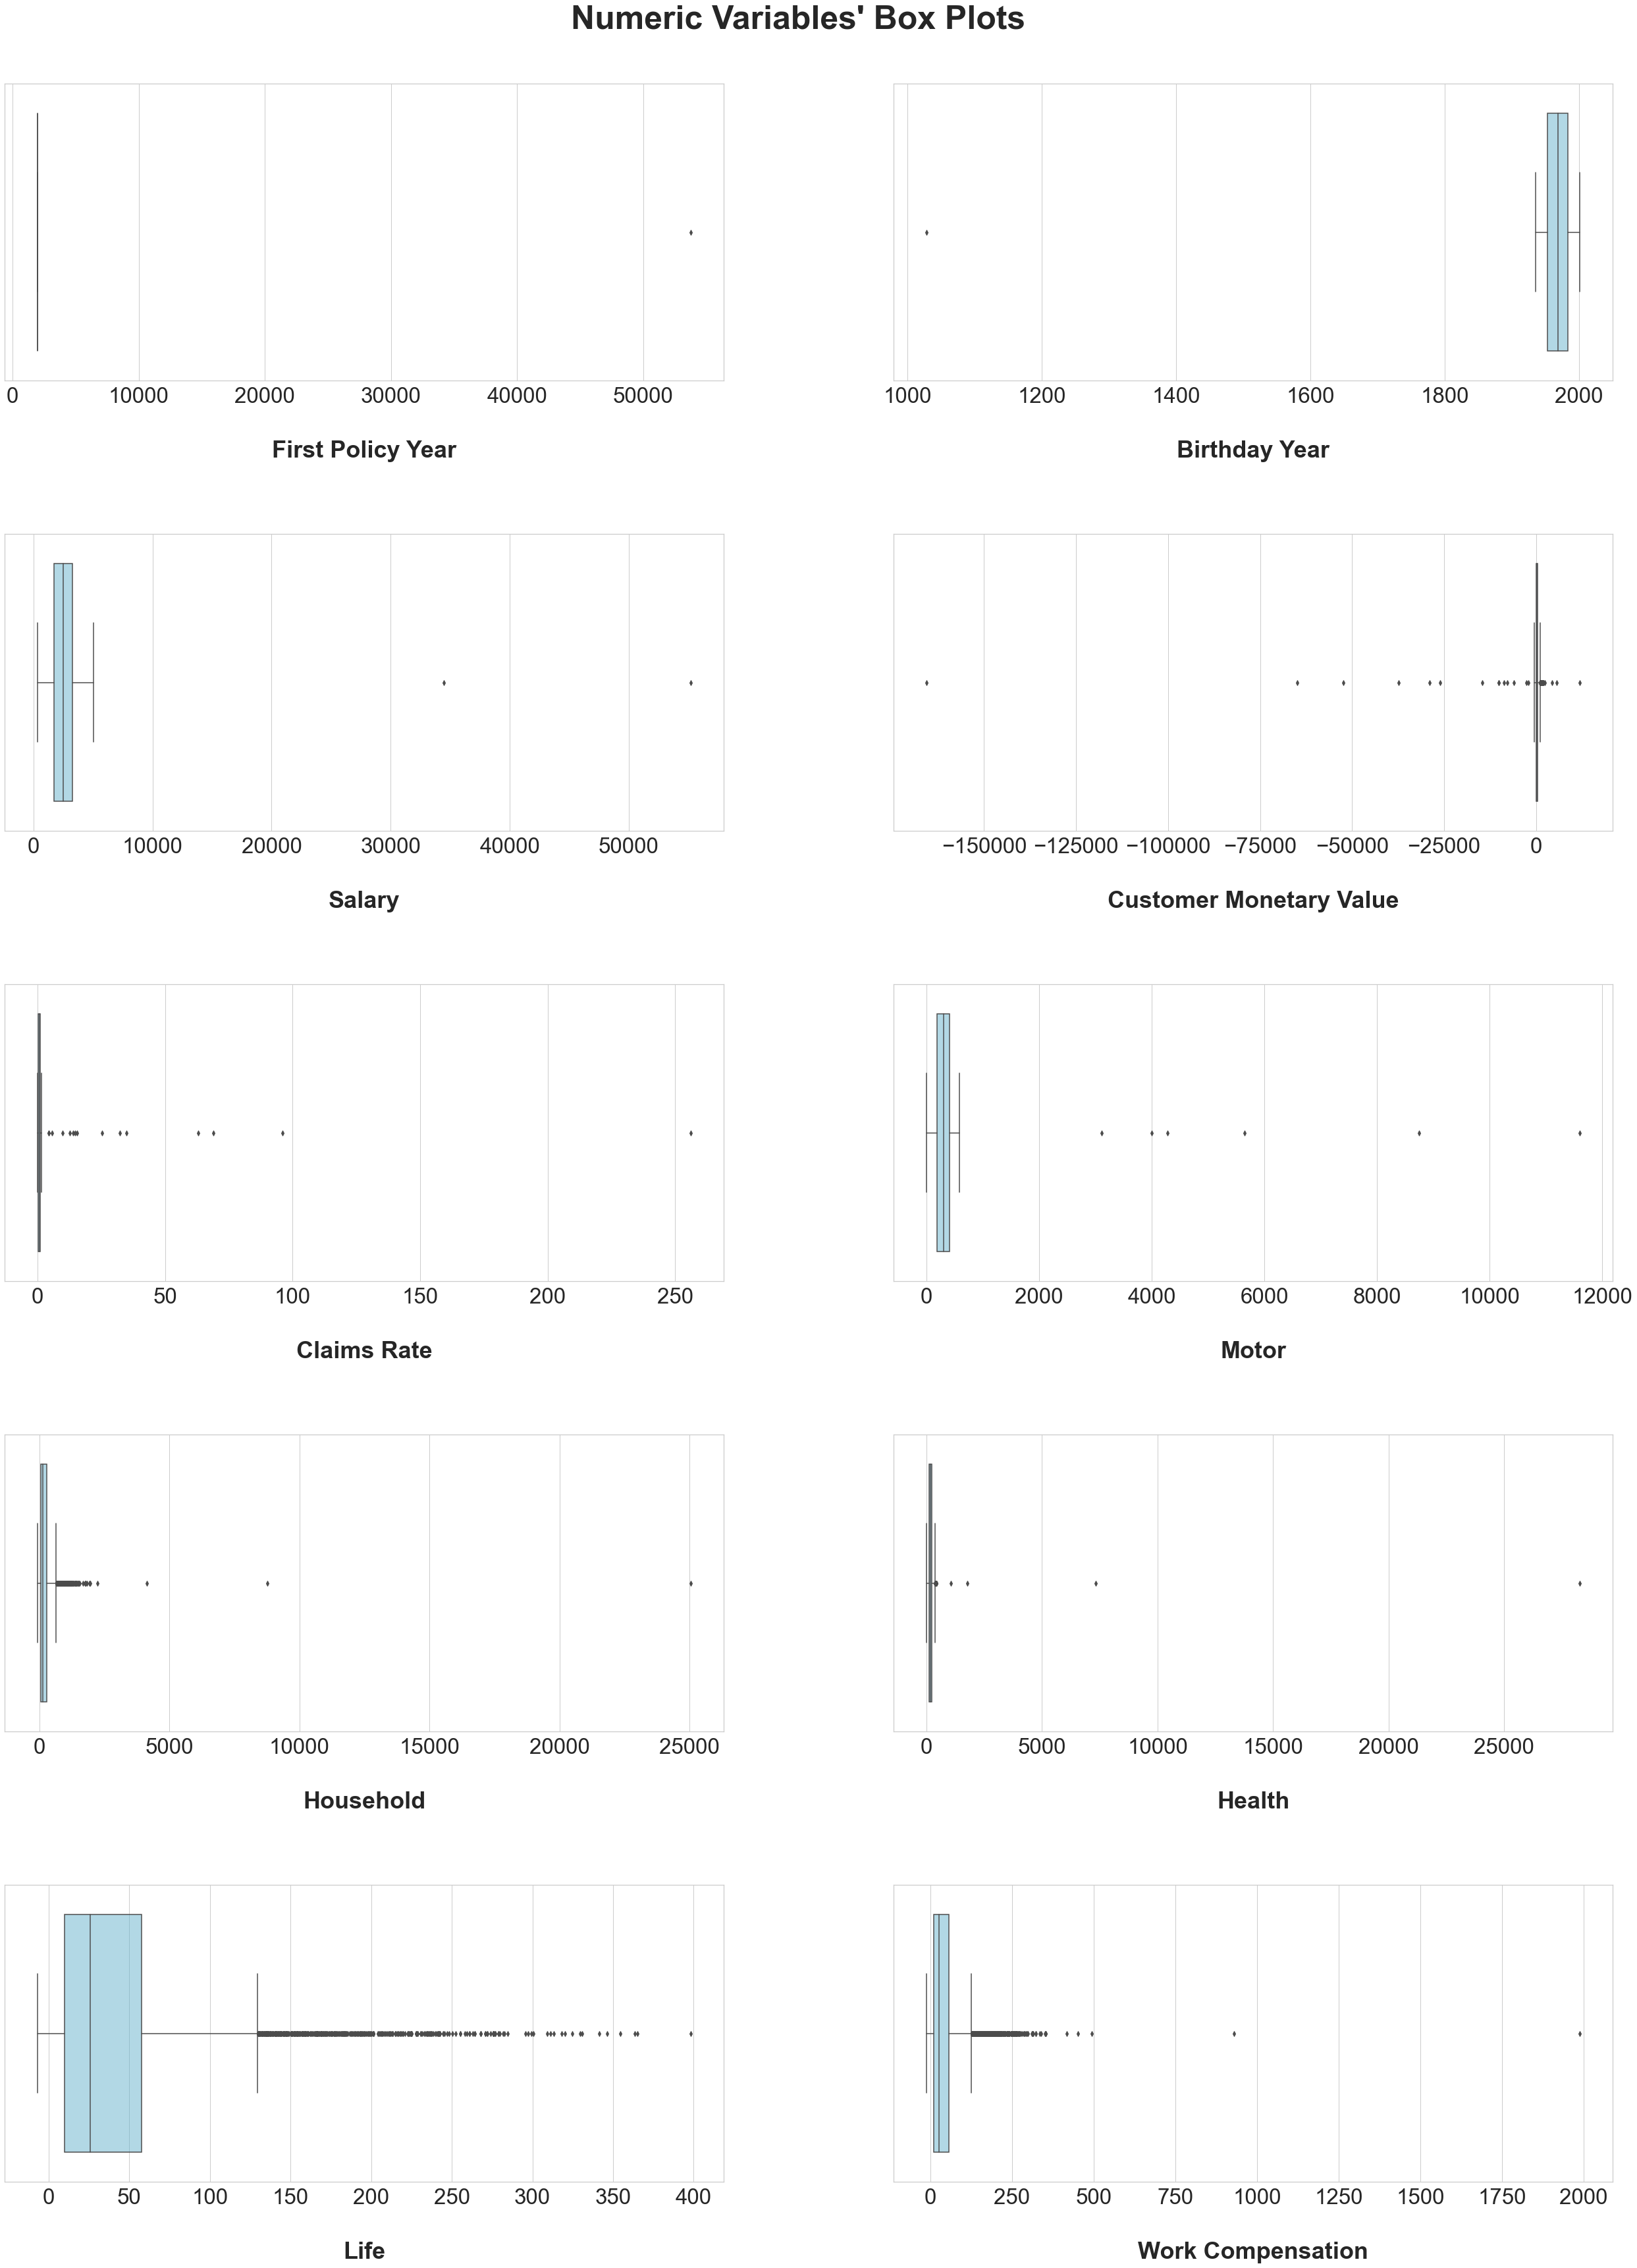

In [106]:
sns.set(font_scale=3)
sns.set_style("whitegrid")

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(5, ceil(len(metric_features) / 5), figsize=(40, 50))
plt.tight_layout(pad=5)

# Plot data
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=customers[feat], 
                ax=ax, 
                boxprops={"facecolor": (.4, 0.7, .8, .5)}).set_xlabel(labels[feat],labelpad=50, fontweight="bold")

# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title, fontsize=50, fontweight="bold")

plt.show()

### <center>Correlation Matrix</center>

In [118]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

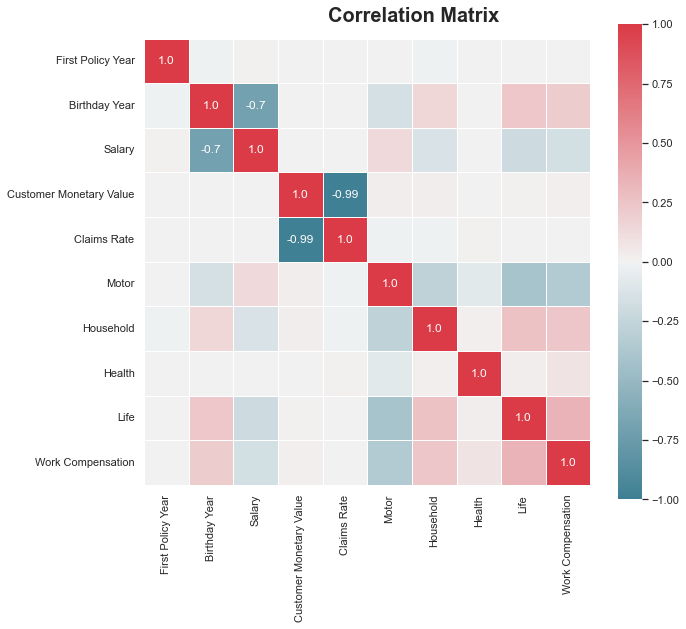

In [135]:
sns.set()

# Prepare figure
fig = plt.figure(figsize=(10, 8))

# Obtain correlation matrix, rounding the values to 2 decimal cases
corr = np.round(customers[metric_features].corr(method="pearson"), decimals=2)

# Build annotation matrix (values above |0.5| will appear annotated in the plot)
mask_annot = np.absolute(corr.values) >= 0.5
annot = np.where(mask_annot, corr.values, np.full(corr.shape,""))

# Getting the labels for the heatmap
ticklabels = list()

for i in labels.keys():
    if i in metric_features:
        ticklabels.append(labels[i])

# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, xticklabels = ticklabels,  yticklabels = ticklabels, annot=annot, 
            cmap=sns.diverging_palette(220, 10, as_cmap=True), fmt='s', vmin=-1, vmax=1, center=0, 
            square=True, linewidths=.5)

# Layout
fig.subplots_adjust(top=0.95)
fig.suptitle("Correlation Matrix", fontsize=20, fontweight="bold")

plt.show()

## 2. Data Preprocessing

### 2.1 Formating Data

In [136]:
# Fixing wrong dtype for variable Children
customers.Children = customers.Children.astype("boolean")

#### 2.1.1 Encoding

In [137]:
customers['EducDeg'].value_counts(dropna=False)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64

In [138]:
customers['EducDeg'].replace(to_replace = "b'4 - PhD'",value = 3, inplace = True)
customers['EducDeg'].replace(to_replace = "b'3 - BSc/MSc'",value = 2, inplace = True)
customers['EducDeg'].replace(to_replace = "b'2 - High School'",value = 1, inplace = True)
customers['EducDeg'].replace(to_replace = "b'1 - Basic'",value = 0, inplace = True)
customers['EducDeg'].value_counts(dropna=False)

b'3 - BSc/MSc'        4799
b'2 - High School'    3510
b'1 - Basic'          1272
b'4 - PhD'             698
NaN                     17
Name: EducDeg, dtype: int64

### 2.2. Filling Missing Values

In [149]:
# Creating a copy to apply central tendency measures imputation
customers_central = customers.copy()

In [150]:
customers_central.median(numeric_only=True)

FirstPolYear     1986.00
BirthYear        1968.00
MonthSal         2501.50
GeoLivArea          3.00
Children            1.00
CustMonVal        186.87
ClaimsRate          0.72
PremMotor         298.61
PremHousehold     132.80
PremHealth        162.81
PremLife           25.56
PremWork           25.67
dtype: float64

In [151]:
# Calculating the mode for each non-numeric feature
modes = customers_central[non_metric_features].mode().loc[0]

In [152]:
modes

EducDeg       b'3 - BSc/MSc'
GeoLivArea               4.0
Children                True
Name: 0, dtype: object

In [153]:
customers_central.fillna(customers_central.median(numeric_only=True), inplace=True)
customers_central.fillna(modes, inplace=True)
customers_central.isna().sum()

FirstPolYear     0
BirthYear        0
EducDeg          0
MonthSal         0
GeoLivArea       0
Children         0
CustMonVal       0
ClaimsRate       0
PremMotor        0
PremHousehold    0
PremHealth       0
PremLife         0
PremWork         0
dtype: int64

In [146]:
imputer.fit(customers[metric_features].values.reshape(-1, 1))
customers[metric_features] = imputer.transform(customers[metric_features].values.reshape(-1, 1))

NameError: name 'imputer' is not defined

### 2.3. Outlier Removal